In [109]:
#installing tensorflow version 2.0
!pip install tensorflow==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [111]:
#styling purpose
!pip install jupyterthemes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [113]:
#Load the training and testing datasets
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [114]:
#the dataset which will be used for training (576 rows)
print(df_train)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [115]:
#the dataset which will be used for testing (120 rows)
print(df_test)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     name==username  description length

EXPLOROTARY DATA ANALYSIS FOR TRIANIGN DATASET

In [116]:
#Getting dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [117]:
#Statistical summary of the dataset
df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [118]:
#Number of unique values in the profile pic column
df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [119]:
#Number of Fake and real accounts in the dataset
df_train['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

In [120]:
#Number of accounts that have an external URL
df_train['external URL'].value_counts()

0    509
1     67
Name: external URL, dtype: int64

EXPLORATORY DATA ANALYSIS FOR TESTING DATASET 

In [121]:
#infromation for the testing dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [122]:
#description of the testing dataset 
df_test.describe

<bound method NDFrame.describe of      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
115            1                  0.29               1                  0.00   
116            1                  0.40               1                  0.00   
117            1                  0.00               2                  0.00   
118            0                  0.17               1                  0.00   
119            1                  0.44               1                  0.00   

     

In [123]:
#Number of missing values 
df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [124]:
#number of fake accounts 
df_test['fake'].value_counts()

0    60
1    60
Name: fake, dtype: int64

CORRELTAION HEATMAP

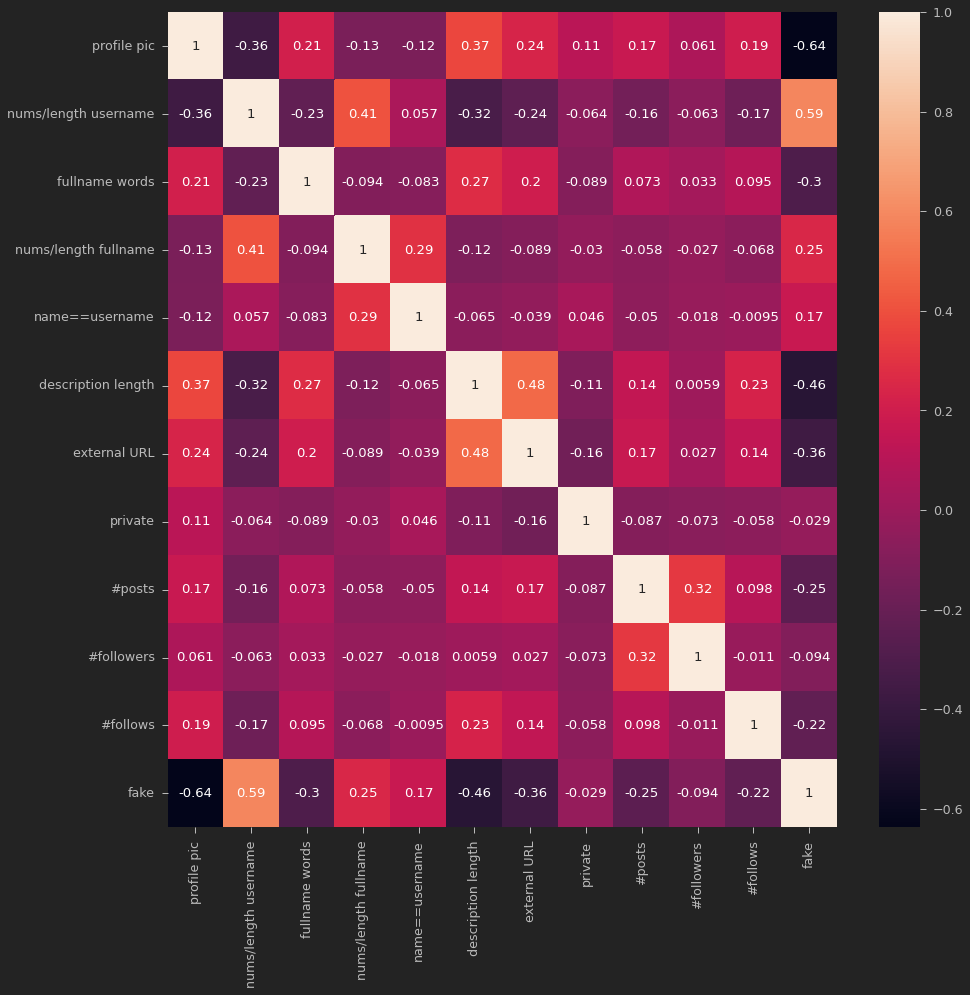

In [125]:
#categories similar characterisitcs between the rows and colunms
plt.figure(figsize=(15,15))
cm = df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

DATA PREPARATION

In [126]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = df_train.drop(columns = ['fake'])
x_test = df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [127]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [128]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = df_train['fake']
y_test = df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [129]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [130]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [131]:
#Having a look at the shapes after scaling the data
print(X_train.shape,X_test.shape)

(576, 11) (120, 11)


In [132]:
print(Y_train.shape,Y_test.shape)

(576, 2) (120, 2)


MODEL BUILDING

In [133]:
#Loading Libraries nessacary for building the main model 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [134]:
#Building the main model

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                600       
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 150)               7650      
_________________________________________________________________
dropout_10 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_11 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                

In [135]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [136]:
#training
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 1s 2ms/sample - loss: 0.5834 - accuracy: 0.7008 - val_loss: 0.5269 - val_accuracy: 0.8103
Epoch 2/20
518/518 [==============================] - 0s 160us/sample - loss: 0.4204 - accuracy: 0.8514 - val_loss: 0.2900 - val_accuracy: 0.9138
Epoch 3/20
518/518 [==============================] - 0s 182us/sample - loss: 0.3468 - accuracy: 0.8687 - val_loss: 0.2235 - val_accuracy: 0.8966
Epoch 4/20
518/518 [==============================] - 0s 116us/sample - loss: 0.3024 - accuracy: 0.8880 - val_loss: 0.1650 - val_accuracy: 0.9310
Epoch 5/20
518/518 [==============================] - 0s 134us/sample - loss: 0.3041 - accuracy: 0.8784 - val_loss: 0.1732 - val_accuracy: 0.9138
Epoch 6/20
518/518 [==============================] - 0s 118us/sample - loss: 0.2895 - accuracy: 0.8938 - val_loss: 0.1268 - val_accuracy: 0.9310
Epoch 7/20
518/518 [==============================] - 0s 160us/sample - loss: 0.2

In [137]:
#Testing 
model.evaluate(X_test, Y_test)

120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3559960722923279, 0.875]

PERFORMANCE OF THE MODEL


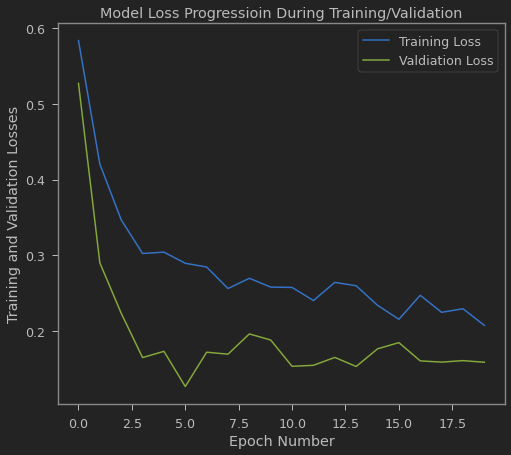

In [138]:
#graph for validation loss and model accuracy
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [139]:
predicted = model.predict(X_test)

In [140]:
#testing the model 
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

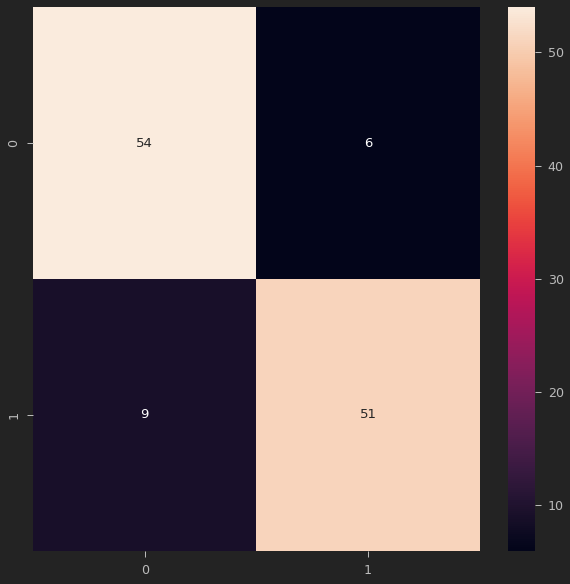

In [141]:
#confusion matrix 
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

In [142]:
#accuracy of model after evaluating 
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120

